### Introduction
Hello.

I am going to use Seaborn Library of Python for creating graphs about 
'Fatal Police Shooting' dataset. 

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [27]:
# Read tables
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [ ]:
percentage_people_below_poverty_level.head()

In [ ]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

In [ ]:
#list of states
percentage_people_below_poverty_level['Geographic Area'].unique()

### Bar Plot 

In [28]:
#Poverty Rate of Each State
percentage_people_below_poverty_level.poverty_rate.replace([0],np.nan,inplace = True)
percentage_people_below_poverty_level.poverty_rate.replace(['-'],np.nan,inplace = True)
percentage_people_below_poverty_level.dropna(inplace = True)
percentage_people_below_poverty_level.tail()
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

TypeError: 'str' object is not callable

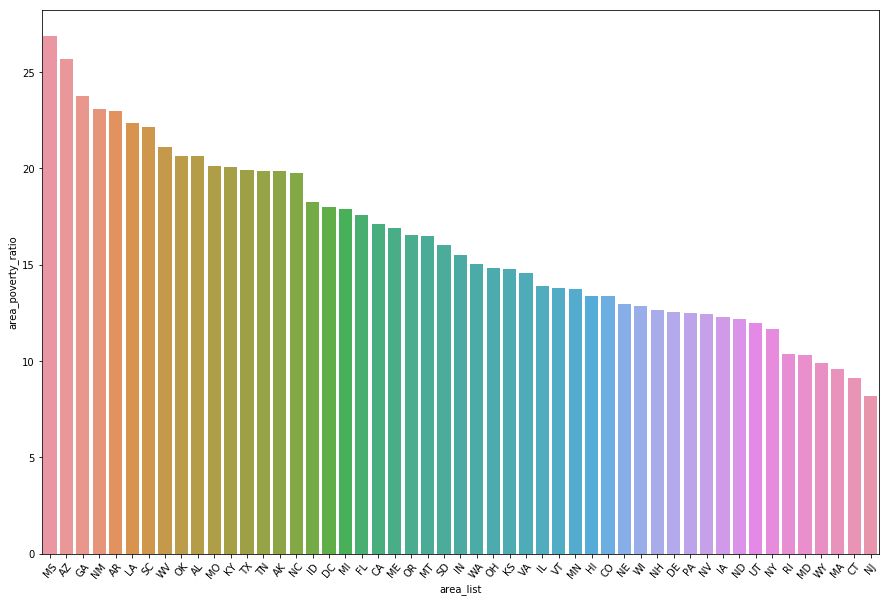

In [29]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x) #her state için ortalama poverty rate hesapladık
    area_poverty_ratio.append(area_poverty_rate)#her state i değerleriyle beraber ekledik.
new_data = pd.DataFrame({'area_list' : area_list , 'area_poverty_ratio' : area_poverty_ratio})
new_index = (new_data['area_poverty_ratio'].sort_values(ascending = False).index.values)
sorted_data = new_data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=50)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Area Poverty Ratio')

What we did at up there ?
1. At first, I cleared data. Dropped ' - ' values from the table.
2. At second step, I needed to find mean value of poverty level of each state.
3. After this, I created a new dataframe with ' state names ' and ' mean values poverty levels of each state '.
4. I created an index from mean values.
5. At last, drawed bar plot using Seaborn library.

In [ ]:
#another bar plot
kill.head()

In [ ]:
kill.name.value_counts()

I need to drop the ' TK TK ' values from the dataframe.

TypeError: 'str' object is not callable

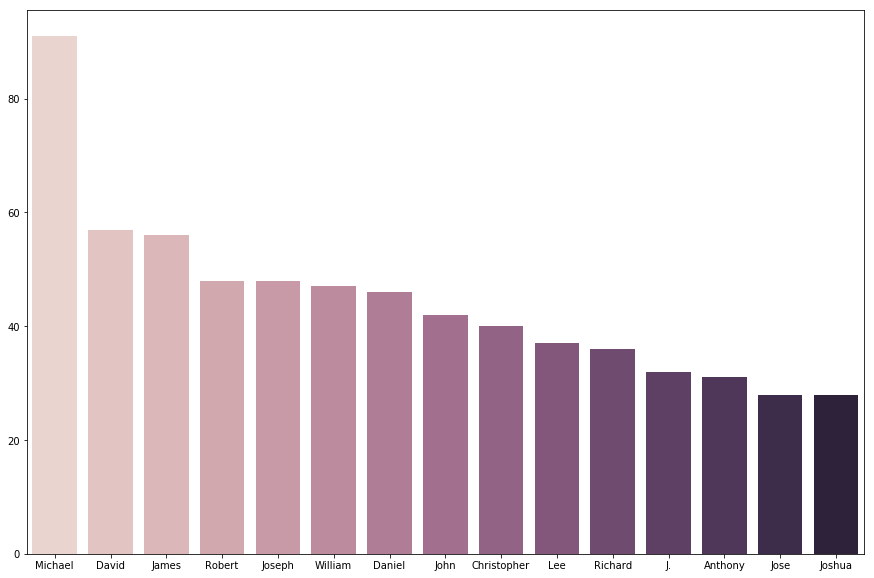

In [30]:
seperate = kill.name[kill.name != 'TK TK'].str.split()
a,b=zip(*seperate) #istenmeyen değerlerden ayrılmıs listeyi zip metoduyla isim = a, soyisim = b şeklinde ayırdık. 
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

#Visualization

plt.figure(figsize=(15,10))
ax = sns.barplot(x=x , y=y, palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Most Common 15 Names Of Killed People')

What I did up there ? 
1. I dropped useless valus from main dataframe, crated a new dataframe name is ' seperate '.
2. I focused on both of ' name ' and ' surname ' attributes. 
3. So, I unzipped the ' seperate ' dataframe.
4. There are two variable. I saved names and surnames with them.
5. I combined these variables. The new list is my new names and surnames's list.
6. I counted each name and surname. And I found the most common ones.
7. At last, in the 'x' variable, I saved the most common name list, in the 'y' variable I saved count value.


In [ ]:
percent_over_25_completed_highSchool.head()

In [ ]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

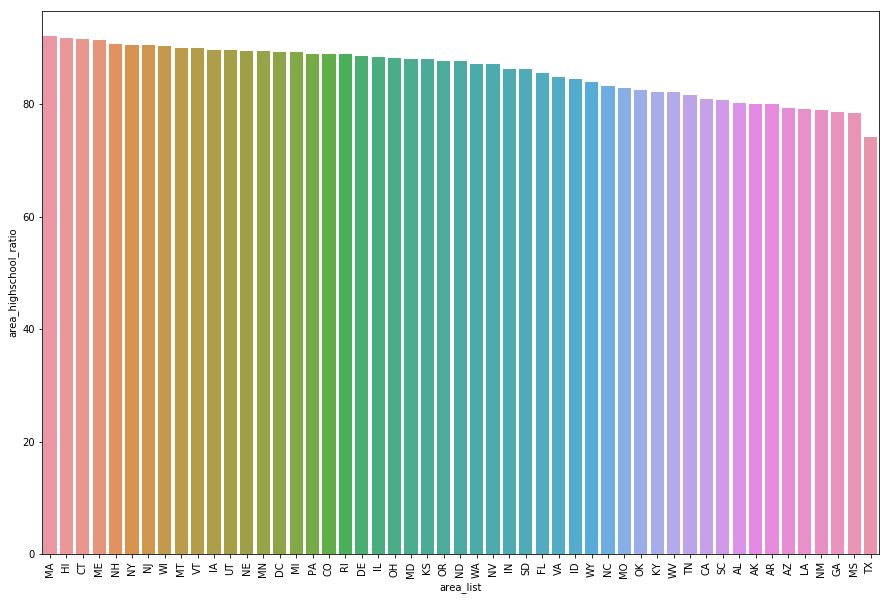

In [31]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0, inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
data = pd.DataFrame({'area_list' : area_list , 'area_highschool_ratio' : area_highschool})
index_new = (data['area_highschool_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data.reindex(index_new)

#visualization

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sorted_data2['area_list'], y = sorted_data2['area_highschool_ratio'])
plt.xticks(rotation = 90)
plt.xlabel = 'States'
plt.ylabel = 'High School Graduate Rating'
plt.title = "Percentage of Given State's Population Above 25 that Has Graduated High School"

In [ ]:
share_race_city.info()

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Races percent'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

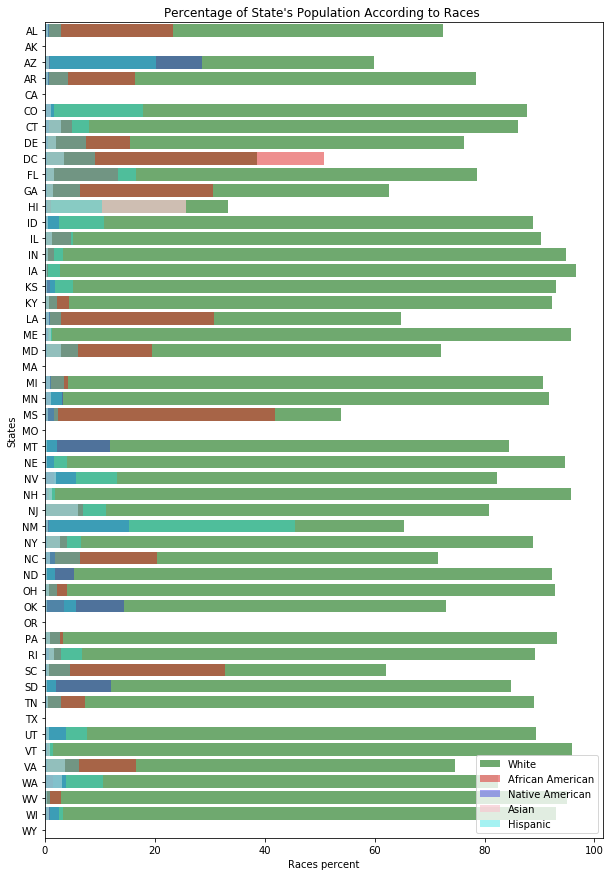

In [32]:
share_race_city.replace(['-'],np.NaN, inplace = True)
share_race_city.replace(['(X)'], np.NaN, inplace = True)
share_race_city.dropna()
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area'] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    
#Visualization

f, ax = plt.subplots(figsize = (10,15))
sns.barplot(x = share_white , y = area_list , color = 'green', alpha = 0.6, label = 'White')
sns.barplot(x = share_black , y = area_list , color = 'red', alpha = 0.5, label = 'African American')
sns.barplot(x = share_native_american, y = area_list, color = 'blue', alpha = 0.4, label = 'Native American')
sns.barplot(x = share_asian, y = area_list, color = 'pink',alpha = 0.7 , label = 'Asian' )
sns.barplot(x = share_hispanic, y = area_list, color = 'cyan', alpha = 0.4, label = 'Hispanic')

ax.legend(loc = 'lower right', frameon = True)
ax.set(xlabel = 'Races percent', ylabel = 'States', title = "Percentage of State's Population According to Races ")

### Horizontal Bar Plot with Subplots
What did I do at up there 
1. I dropped out '-' and (x) values. 
2. Calculated percentage values for each race.
3. Drew graph.

### Point Plot

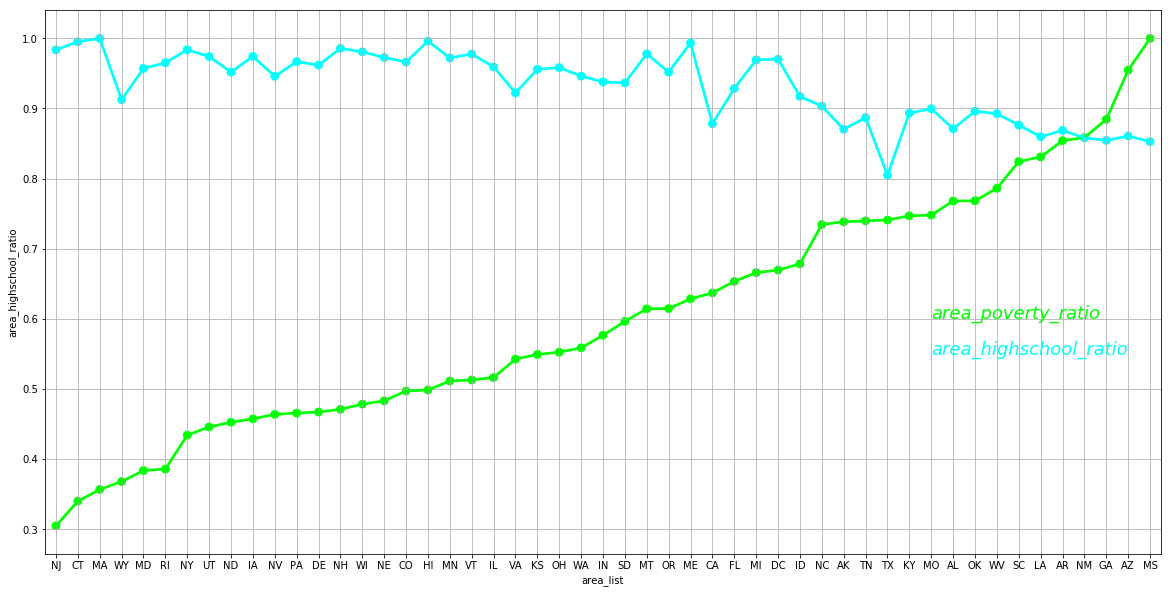

In [33]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis = 1)
data.sort_values('area_poverty_ratio', inplace = True)

#Visualization

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio', data=data, color = 'lime', alpha=0.5)
sns.pointplot(x='area_list',y='area_highschool_ratio', data=data, color = 'cyan', alpha=0.5)
plt.text(40,0.6,'area_poverty_ratio', color = 'lime', style = 'italic', fontsize = 18 )
plt.text(40,0.55, 'area_highschool_ratio', color = 'cyan', style = 'italic', fontsize = 18)
plt.grid()

#### What did I do up here ?
* Made a simply normalization to dataframes which I will use.
* I made it because of I needed to show two different dataframes. And dataframes had 
 different value scales.
* Drew graph.

In [ ]:
data.head()

### Joint Plot


In [ ]:
ax = sns.jointplot(x='area_poverty_ratio', y='area_highschool_ratio', data = data, kind='kde', size=7)
plt.savefig('graph.png')
plt.show()

In [ ]:
g = sns.jointplot(x='area_poverty_ratio', y='area_highschool_ratio', data = data, ratio=5, color = 'y')
plt.show()

### Pie Chart

In [ ]:
kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index
colors = ['red','green','cyan','grey','yellow','orange']
explode = [0,0.2,0,0,0,0]
sizes = kill.race.value_counts().values

#visualization

plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%')

What did I do up there ?
1. I created a list with races of people had killed.
2. I created another list with indexes of races.
3. I created a figure with labels, size, explode parameters.
4. Explode parameter means, how far between of each piece of pie.

Pie chart calculates percentage of value to all value automatically.

### LM Plot

In [ ]:
data.head()
sns.lmplot(x='area_poverty_ratio',y='area_highschool_ratio', data = data)
plt.show()

### KDE Plot

In [ ]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio, shade = True, cut = 5)
#cut parameter means, increase of scale at the axis. 
plt.show()

### Violin Plot

In [ ]:
pal = sns.cubehelix_palette(2,rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner='points')
plt.show()

Violin Plot;
* gives us to frequency of data samples.
* works with numeric datas.

### Heat Map

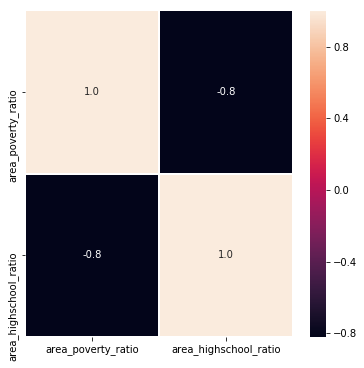

In [35]:
f,ax = plt.subplots(figsize = (6,6))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt = '.1f', ax=ax)
#ax = ax means, fill the figure with heatmap.
plt.show()

### Box Plot

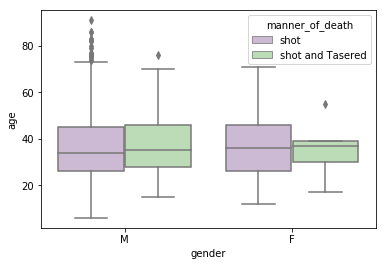

In [36]:
sns.boxplot(x='gender', y='age', hue='manner_of_death', data=kill, palette = 'PRGn')
plt.show()

### Swarm Plot

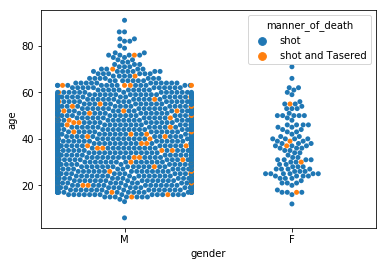

In [37]:
sns.swarmplot(x='gender', y='age', hue='manner_of_death', data = kill)
plt.show()

### Pair Plot

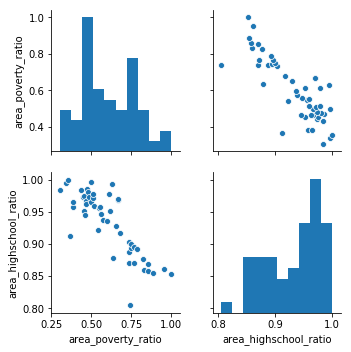

In [38]:
sns.pairplot(data)
plt.show()

### Count Plot

In [39]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

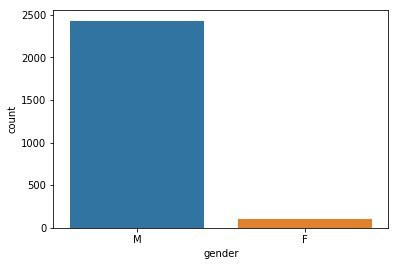

In [40]:
sns.countplot(kill.gender)
plt.show()

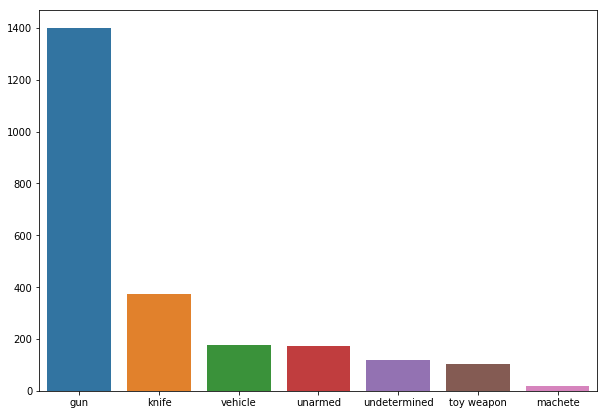

In [41]:
armed = kill.armed.value_counts()
plt.figure(figsize = (10,7))
sns.barplot(x = armed[:7].index, y = armed[:7].values)
plt.show()

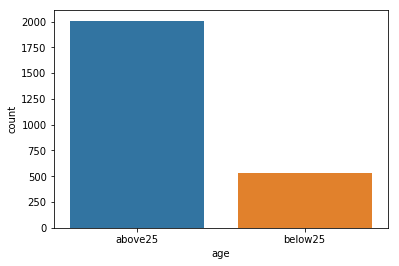

In [42]:
above25 = ['above25' if i>= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)

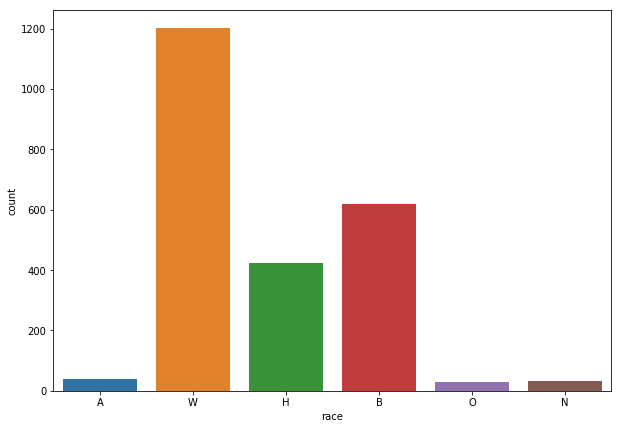

In [43]:
plt.figure(figsize = (10,7))
sns.countplot(data = kill, x='race')
plt.show()

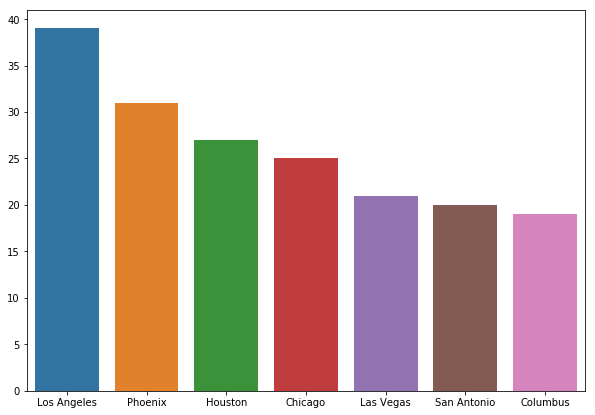

In [44]:
cities = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = cities[:7].index, y = cities[:7].values)
plt.show()

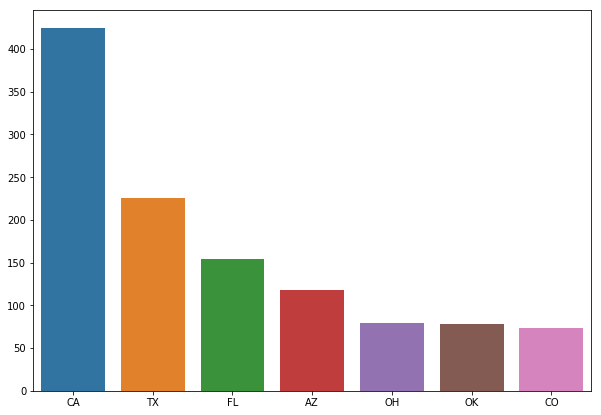

In [45]:
states = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = states[:7].index, y = states[:7].values)
plt.show()

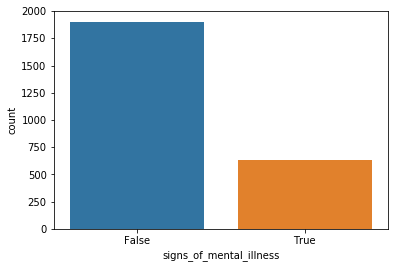

In [46]:
sns.countplot(kill.signs_of_mental_illness)
plt.show()

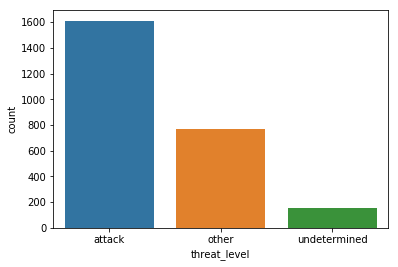

In [47]:
sns.countplot(kill.threat_level)
plt.show()

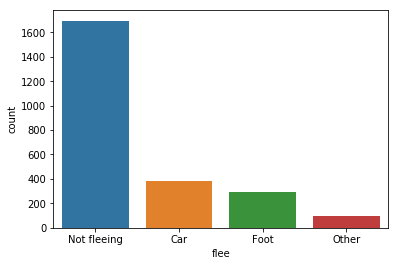

In [48]:
sns.countplot(kill.flee)
plt.show()

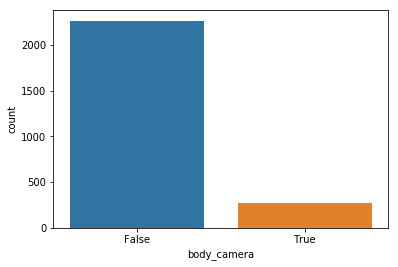

In [49]:
sns.countplot(kill.body_camera)
plt.show()

### Conclusion

I am waiting your comments and ratings. Thank you !